In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import *
from sklearn.metrics import accuracy_score

In [2]:

data = pd.read_csv('C:\\Users\\DEEP\\OneDrive\\Desktop\\Data\\cardekho_new_updated.csv')

In [3]:
print(data.shape[0],",",data.shape[1])

19974 , 13


In [4]:
data.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport Titanium,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [5]:
def null_count():
    return pd.DataFrame({'features': data.columns,
                'dtypes': data.dtypes.values,
                'NaN count': data.isnull().sum().values,
                'NaN percentage': data.isnull().sum().values/data.shape[0]}).style.background_gradient(cmap='Blues',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,full_name,object,0,0.000000
1,selling_price,object,0,0.000000
2,new_price,object,10410,0.521178
3,year,int64,0,0.000000
4,seller_type,object,0,0.000000
5,km_driven,object,0,0.000000
6,owner_type,object,0,0.000000
7,fuel_type,object,0,0.000000
8,transmission_type,object,0,0.000000
9,mileage,object,160,0.008010


### Cleaning selling_price column

In [6]:
for i in range(data.shape[0]):
    try:
        price = float(data['selling_price'][i].split(' ')[0])
        digit = data['selling_price'][i].split(' ')[1]
        if digit == 'Lakh*':
            price = price * 100000
            data['selling_price'][i] = price
        elif digit == 'Cr*':
            price = price * 10000000
            data['selling_price'][i] = price
    except:
        price = data['selling_price'][i][:-1]    # price<lakh(90,000)
        price = price.replace(',', '')
        data['selling_price'][i] = float(price)

### Cleaning km_driven, mileage, engine, max_power, seats columns

In [7]:
# kilometer driven
data['km_driven'] = data['km_driven'].str.split(' ', n=1, expand=True)[0]
data['km_driven'] = data['km_driven'].str.replace(',','')

# Mileage
data['mileage'] = data['mileage'].str.split(' ', expand=True)[0].str.split('e', expand=True)[2]

# Engine
data['engine'] = data['engine'].str.split(' ', expand=True)[0].str.split('e',expand=True)[1]

# Max Power
data['max_power'] = data['max_power'].str.split(' ', expand=True)[1].str.split('r',expand=True)[1]

# Seats 
data['seats'] = data['seats'].str.split('s', expand=True)[1]

In [8]:
data

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,120000,NaN,2012,Individual,120000,First Owner,Petrol,Manual,19.7,796,46.3,5
1,Hyundai i10 Asta,550000,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,20000,First Owner,Petrol,Manual,18.9,1197,82,5
2,Hyundai i20 Asta,215000,NaN,2010,Individual,60000,First Owner,Petrol,Manual,17.0,1197,80,5
3,Maruti Alto K10 2010-2014 VXI,226000,NaN,2012,Individual,37000,First Owner,Petrol,Manual,20.92,998,67.1,5
4,Ford Ecosport Titanium,570000,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,30000,First Owner,Diesel,Manual,22.77,1498,98.59,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios 1.4 GXD,650000,NaN,2017,Dealer,69480,First Owner,Diesel,Manual,23.59,1364,67.05,5
19970,Maruti Ertiga BSIV VXI,925000,NaN,2019,Dealer,18000,First Owner,Petrol,Manual,17.5,1373,91.1,7
19971,Skoda Rapid 1.5 TDI Elegance,425000,NaN,2015,Dealer,67000,First Owner,Diesel,Manual,21.14,1498,103.52,5
19972,Mahindra XUV500 W6 2WD,1.225e+06,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016,Dealer,3800000,First Owner,Diesel,Manual,16.0,2179,140,7


### Changing the data types of the columns

In [9]:
cols = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

for col in cols:
    try:
        data[col] = data[col].astype(int)
    except:
        data[col] = data[col].astype(float)

In [10]:
def datatyp():
    return pd.DataFrame({'features': data.columns,
                'dtypes': data.dtypes.values})
datatyp()

,features,dtypes
0,full_name,object
1,selling_price,int32
2,new_price,object
3,year,int64
4,seller_type,object
5,km_driven,int32
6,owner_type,object
7,fuel_type,object
8,transmission_type,object
9,mileage,float64


### Creating new feature Company

In [11]:
data['full_name'] = data['full_name'].str.split(' ').str.slice(0,3).str.join(' ')
data['company'] = data['full_name'].str.split(' ').str.slice(0,1).str.join(' ')

In [12]:
data

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,company
0,Maruti Alto Std,120000,NaN,2012,Individual,120000,First Owner,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti
1,Hyundai i10 Asta,550000,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,20000,First Owner,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai
2,Hyundai i20 Asta,215000,NaN,2010,Individual,60000,First Owner,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai
3,Maruti Alto K10,225999,NaN,2012,Individual,37000,First Owner,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti
4,Ford Ecosport Titanium,570000,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,30000,First Owner,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios,650000,NaN,2017,Dealer,69480,First Owner,Diesel,Manual,23.59,1364.0,67.05,5.0,Toyota
19970,Maruti Ertiga BSIV,925000,NaN,2019,Dealer,18000,First Owner,Petrol,Manual,17.50,1373.0,91.10,7.0,Maruti
19971,Skoda Rapid 1.5,425000,NaN,2015,Dealer,67000,First Owner,Diesel,Manual,21.14,1498.0,103.52,5.0,Skoda
19972,Mahindra XUV500 W6,1225000,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016,Dealer,3800000,First Owner,Diesel,Manual,16.00,2179.0,140.00,7.0,Mahindra


In [13]:
data.drop(columns=['new_price'], axis=1, inplace=True)
data.head()

,full_name,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,company
0,Maruti Alto Std,120000,2012,Individual,120000,First Owner,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti
1,Hyundai i10 Asta,550000,2016,Individual,20000,First Owner,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai
2,Hyundai i20 Asta,215000,2010,Individual,60000,First Owner,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai
3,Maruti Alto K10,225999,2012,Individual,37000,First Owner,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti
4,Ford Ecosport Titanium,570000,2015,Dealer,30000,First Owner,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford


### Data Analysis

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
selling_price,19974.0,739294.432612,910400.116520,25000.0,340000.00,520000.0,785000.00,39500000.0
year,19974.0,2014.526134,3.248791,1991.0,2013.00,2015.0,2017.00,2021.0
km_driven,19974.0,58238.894663,51727.595500,100.0,31114.00,52000.0,74000.00,3800000.0
mileage,19814.0,19.503637,4.298090,4.0,16.95,19.3,22.32,120.0
engine,19864.0,1477.805981,519.843056,72.0,1197.00,1248.0,1582.00,6752.0
max_power,19637.0,99.448762,43.784904,25.4,73.94,86.8,114.00,626.0
seats,19887.0,5.319807,0.837676,2.0,5.00,5.0,5.00,14.0


In [15]:
data['year'].unique()

array([2012, 2016, 2010, 2015, 2013, 2018, 2019, 2017, 2014, 2011, 2007,
       2009, 2004, 2020, 2006, 2008, 2000, 2005, 2002, 1999, 2003, 1997,
       2001, 1992, 2021, 1998, 1991, 1996], dtype=int64)

In [16]:
data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [17]:
data['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [18]:
data['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [19]:
data['company'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Mahindra', 'Tata', 'Renault',
       'Nissan', 'Mini', 'Mercedes-Benz', 'Toyota', 'Fiat', 'Volkswagen',
       'Honda', 'Chevrolet', 'Ambassador', 'Datsun', 'Kia', 'BMW',
       'Mitsubishi', 'Audi', 'Skoda', 'LandRover', 'Jaguar', 'Daewoo',
       'Bentley', 'MG', 'Isuzu', 'Porsche', 'Volvo', 'Lexus', 'Jeep',
       'Premier', 'Maserati', 'Force', 'Lamborghini', 'Ferrari',
       'OpelCorsa', 'Mercedes-AMG', 'DC', 'Rolls-Royce', 'Opel'],
      dtype=object)

In [20]:
null_count()

,features,dtypes,NaN count,NaN percentage
0,full_name,object,0,0.000000
1,selling_price,int32,0,0.000000
2,year,int64,0,0.000000
3,seller_type,object,0,0.000000
4,km_driven,int32,0,0.000000
5,owner_type,object,0,0.000000
6,fuel_type,object,0,0.000000
7,transmission_type,object,0,0.000000
8,mileage,float64,160,0.008010
9,engine,float64,110,0.005507


In [21]:
data

,full_name,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,company
0,Maruti Alto Std,120000,2012,Individual,120000,First Owner,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti
1,Hyundai i10 Asta,550000,2016,Individual,20000,First Owner,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai
2,Hyundai i20 Asta,215000,2010,Individual,60000,First Owner,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai
3,Maruti Alto K10,225999,2012,Individual,37000,First Owner,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti
4,Ford Ecosport Titanium,570000,2015,Dealer,30000,First Owner,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios,650000,2017,Dealer,69480,First Owner,Diesel,Manual,23.59,1364.0,67.05,5.0,Toyota
19970,Maruti Ertiga BSIV,925000,2019,Dealer,18000,First Owner,Petrol,Manual,17.50,1373.0,91.10,7.0,Maruti
19971,Skoda Rapid 1.5,425000,2015,Dealer,67000,First Owner,Diesel,Manual,21.14,1498.0,103.52,5.0,Skoda
19972,Mahindra XUV500 W6,1225000,2016,Dealer,3800000,First Owner,Diesel,Manual,16.00,2179.0,140.00,7.0,Mahindra


### Before Removing Outliers

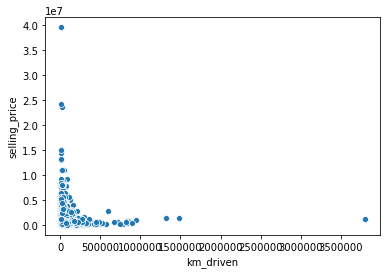

In [22]:
sns.scatterplot(data['km_driven'],data['selling_price'])
plt.show()

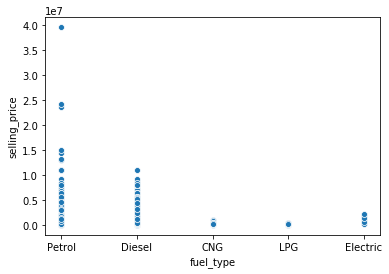

In [23]:
sns.scatterplot(data['fuel_type'],data['selling_price'])
plt.show()

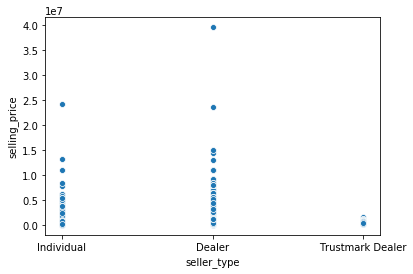

In [24]:
sns.scatterplot(data['seller_type'],data['selling_price'])
plt.show()

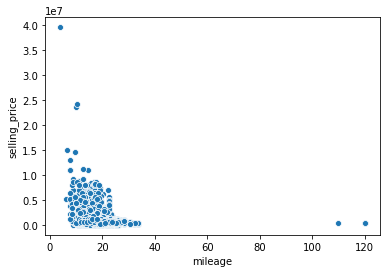

In [25]:
sns.scatterplot(data['mileage'],data['selling_price'])
plt.show()

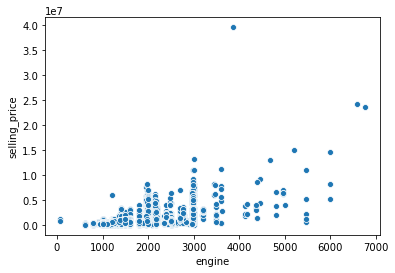

In [26]:
sns.scatterplot(data['engine'],data['selling_price'])
plt.show()

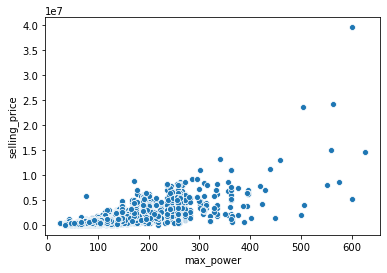

In [27]:
sns.scatterplot(data['max_power'],data['selling_price'])
plt.show()

### Handling Missing Values In mileage, engine, max_power and seats

In [28]:
for i in ['mileage', 'engine', 'max_power', 'seats']:
    company_name = data[data[i].isnull()]['company'].value_counts().index[0]
    if data[i].nunique()>10:
        values = data[data['company']==company_name][i].mean()
    else:
        values = data[data['company']==company_name][i].median()
        
    data[i].fillna(values, inplace=True)

### Removing Outliers

In [29]:
data = data[data['selling_price'] < 10000000]
data = data[data['km_driven'] < 600000]
data = data[data['mileage'] < 40]
data = data[data['engine'] < 6100]
data = data[data['max_power'] < 450]
data = data.reset_index(drop=True)

In [30]:
null_count()

,features,dtypes,NaN count,NaN percentage
0,full_name,object,0,0.000000
1,selling_price,int32,0,0.000000
2,year,int64,0,0.000000
3,seller_type,object,0,0.000000
4,km_driven,int32,0,0.000000
5,owner_type,object,0,0.000000
6,fuel_type,object,0,0.000000
7,transmission_type,object,0,0.000000
8,mileage,float64,0,0.000000
9,engine,float64,0,0.000000


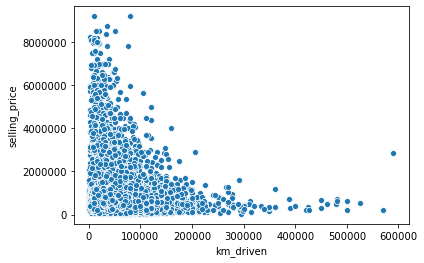

In [31]:
sns.scatterplot(data['km_driven'],data['selling_price'])
plt.show()

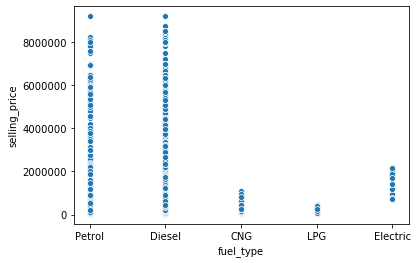

In [32]:
sns.scatterplot(data['fuel_type'],data['selling_price'])
plt.show()

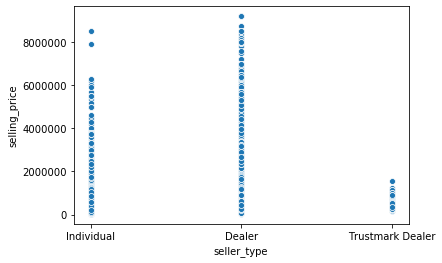

In [33]:
sns.scatterplot(data['seller_type'],data['selling_price'])
plt.show()

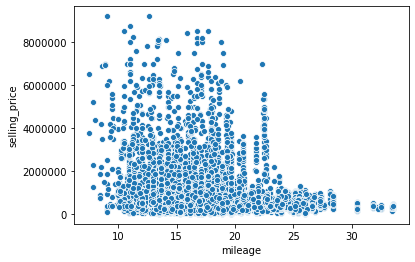

In [34]:
sns.scatterplot(data['mileage'],data['selling_price'])
plt.show()

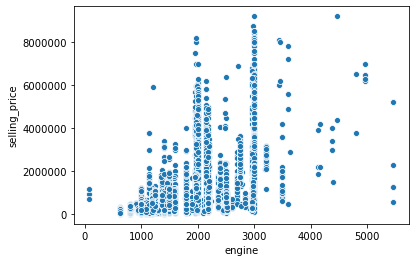

In [35]:
sns.scatterplot(data['engine'],data['selling_price'])
plt.show()

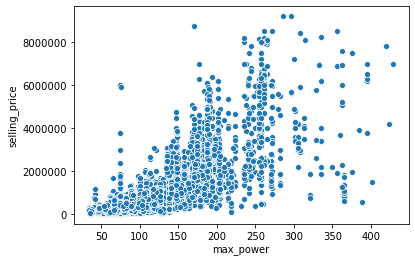

In [36]:
sns.scatterplot(data['max_power'],data['selling_price'])
plt.show()

In [37]:
data

,full_name,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,company
0,Maruti Alto Std,120000,2012,Individual,120000,First Owner,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti
1,Hyundai i10 Asta,550000,2016,Individual,20000,First Owner,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai
2,Hyundai i20 Asta,215000,2010,Individual,60000,First Owner,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai
3,Maruti Alto K10,225999,2012,Individual,37000,First Owner,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti
4,Ford Ecosport Titanium,570000,2015,Dealer,30000,First Owner,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19935,Maruti A Star,225000,2009,Individual,15000,First Owner,Petrol,Manual,19.00,998.0,66.10,5.0,Maruti
19936,Toyota Platinum Etios,650000,2017,Dealer,69480,First Owner,Diesel,Manual,23.59,1364.0,67.05,5.0,Toyota
19937,Maruti Ertiga BSIV,925000,2019,Dealer,18000,First Owner,Petrol,Manual,17.50,1373.0,91.10,7.0,Maruti
19938,Skoda Rapid 1.5,425000,2015,Dealer,67000,First Owner,Diesel,Manual,21.14,1498.0,103.52,5.0,Skoda


In [38]:
data['seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2.,  9., 10., 14.])

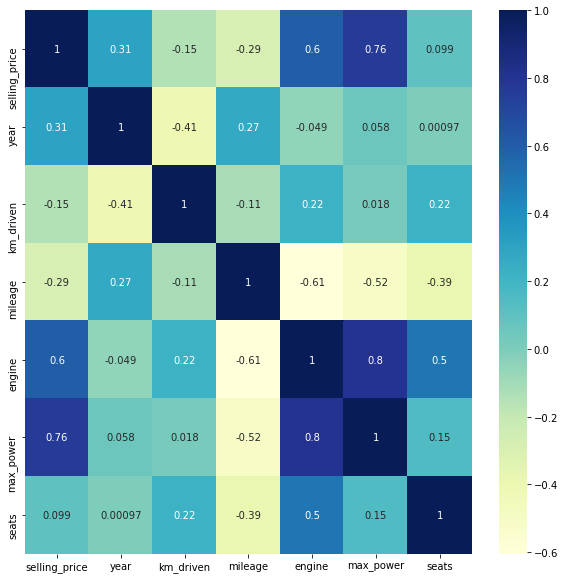

In [67]:
plt.figure(figsize = (10,10))
plot = sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")

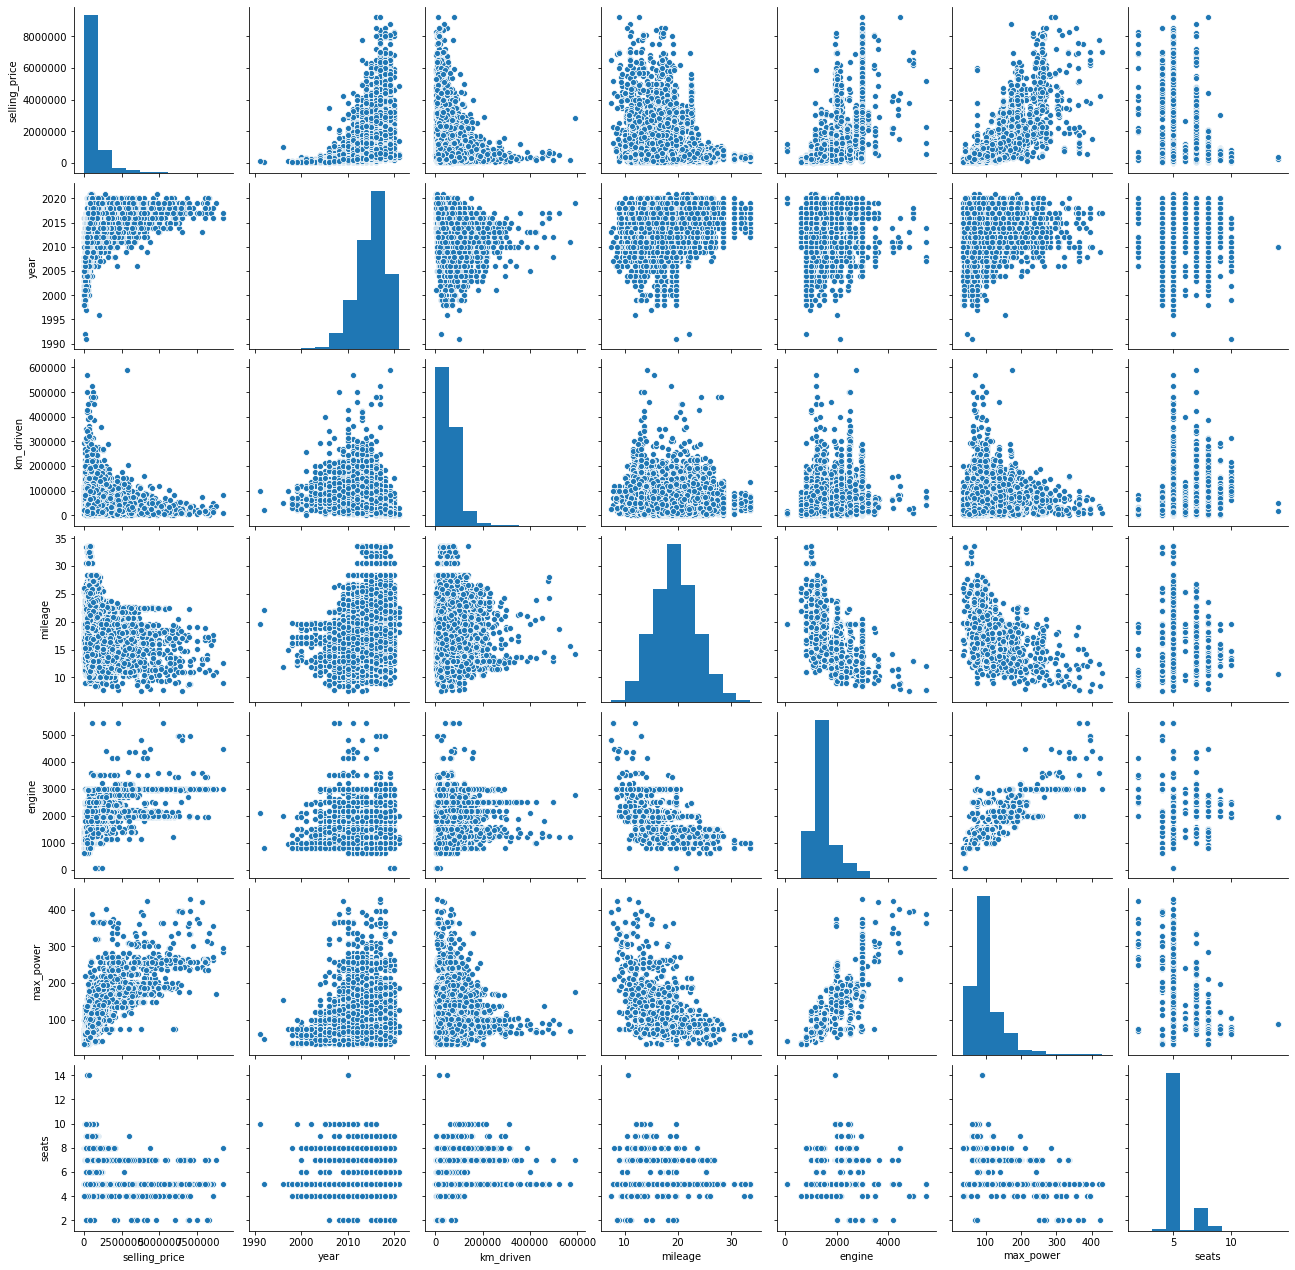

In [40]:
sns.pairplot(data)

In [41]:
X = data.drop(columns = ['selling_price','company'])
y = data['selling_price']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=746)

In [43]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [44]:
ohe = OneHotEncoder()
ohe.fit(X[['full_name','year','seller_type','km_driven','owner_type','fuel_type','transmission_type','mileage','engine','max_power','seats']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [45]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['full_name','year','seller_type','km_driven','owner_type','fuel_type','transmission_type','mileage','engine','max_power','seats']),
                                      remainder='passthrough')

In [46]:
lr = LinearRegression()

In [47]:
pipe = make_pipeline(column_trans, lr)

In [48]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador Avigo 1800', 'Ambassador Avigo 2000',
       'Ambassador Classic 1800', ..., 'Volvo XC60 D4', 'Volvo XC60 D5',
       'Volvo XC90 D5'], dtype=object),
                                                                            array([1...
                                                                            array([ 2.,  4.,  5.,  6.,  7.,  8.,  9., 10., 14.])],
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                               

In [49]:
y_pred = pipe.predict(X_test)
y_pred

array([459007.46286088, 385651.0736605 , 216065.6372463 , ...,
       295812.09775495, 340765.4914271 , 281615.10050329])

In [50]:
r2_score(y_test,y_pred)

0.9012294943445133

In [51]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('MAE score = ',MAE)
print('MSE score = ',MSE)
print('RMSE score = ',RMSE)

MAE score =  130819.71031816736
MSE score =  68922257391.49652
RMSE score =  262530.48849894846


In [52]:
cross_validation_score =  cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 10).mean()
print('Cross-Validation score = ',cross_validation_score)

Cross-Validation score =  0.8142846544753077


In [53]:
def plotGraph(y_test,y_pred):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(range(my_range), range(my_range), 'o')
    plt.show()
    return

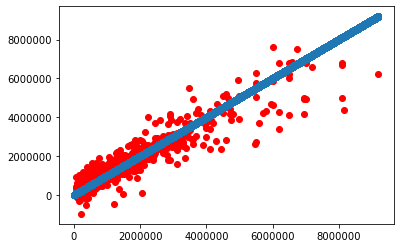

In [54]:
plotGraph(y_test,y_pred)

In [55]:
pipe.predict(pd.DataFrame([['Hyundai i20 Magna', 2018, 'Individual', 40000, 'First Owner', 'Petrol', 'Manual', 18.6, 1197, 81.83, 5]], columns=['full_name','year','seller_type','km_driven','owner_type','fuel_type','transmission_type','mileage','engine','max_power','seats']))

array([651409.59374145])

In [56]:
pipe.predict(pd.DataFrame([['Honda Amaze S', 2016, 'Dealer', 39993, 'First Owner', 'Petrol', 'Manual', 18.6, 1199, 88.76, 5]], columns=['full_name','year','seller_type','km_driven','owner_type','fuel_type','transmission_type','mileage','engine','max_power','seats']))

array([465002.99843042])

In [57]:
pipe.predict(pd.DataFrame([['Maruti Swift Dzire', 2016, 'Individual', 54000, 'First Owner', 'Petrol', 'Manual', 20.85, 1197, 83.14, 5]], columns=['full_name','year','seller_type','km_driven','owner_type','fuel_type','transmission_type','mileage','engine','max_power','seats']))

array([570314.2769373])

In [58]:
pipe.predict(pd.DataFrame([['Mahindra Marazzo M2', 2019, 'Individual', 36000, 'First Owner', 'Diesel', 'Manual', 17.3, 1497, 121, 7]], columns=['full_name','year','seller_type','km_driven','owner_type','fuel_type','transmission_type','mileage','engine','max_power','seats']))

array([865955.8239408])

In [59]:
pipe.predict(pd.DataFrame([['Chevrolet Sail 1.3', 2014, 'Individual', 90000, 'First Owner', 'Diesel', 'Manual', 22.1, 1248, 74, 5]], columns=['full_name','year','seller_type','km_driven','owner_type','fuel_type','transmission_type','mileage','engine','max_power','seats']))

array([351814.18805609])

In [60]:
pipe.predict(pd.DataFrame([['Mercedes-Benz E-Class E250', 2011, 'Dealer', 57000, 'First Owner', 'Diesel', 'Automatic', 14.21, 2143, 203, 5]], columns=['full_name','year','seller_type','km_driven','owner_type','fuel_type','transmission_type','mileage','engine','max_power','seats']))

array([1425059.41516148])

In [61]:
pipe.predict(pd.DataFrame([['Mahindra E Verito', 2020, 'Dealer', 2746, 'First Owner', 'Electric', 'Automatic', 14, 72, 41.57, 5]], columns=['full_name','year','seller_type','km_driven','owner_type','fuel_type','transmission_type','mileage','engine','max_power','seats']))

array([788829.61747361])

In [62]:
pipe.predict(pd.DataFrame([['Toyota Camry Hybrid', 2015, 'Dealer', 49500, 'First Owner', 'Electric', 'Automatic', 19.16, 2494, 157.7, 5]], columns=['full_name','year','seller_type','km_driven','owner_type','fuel_type','transmission_type','mileage','engine','max_power','seats']))

array([1699625.184347])

###### Real data

In [63]:
pipe.predict(pd.DataFrame([['Ford Fiesta 1.4', 2010, 'Dealer', 58000, 'First Owner', 'Petrol', 'Manual', 16.6, 1388, 68, 5]], columns=['full_name','year','seller_type','km_driven','owner_type','fuel_type','transmission_type','mileage','engine','max_power','seats']))

array([238772.80923699])

In [64]:
pipe.predict(pd.DataFrame([['BMW 5 Series', 2009, 'Dealer', 80000, 'First Owner', 'Diesel', 'Automatic', 18.48, 1995, 177, 5]], columns=['full_name','year','seller_type','km_driven','owner_type','fuel_type','transmission_type','mileage','engine','max_power','seats']))

array([1378620.66738447])

In [65]:
pipe.predict(pd.DataFrame([['BMW 5 Series', 2009, 'Dealer', 9400, 'First Owner', 'Petrol', 'Automatic', 20.28, 1462, 103.25, 5]], columns=['full_name','year','seller_type','km_driven','owner_type','fuel_type','transmission_type','mileage','engine','max_power','seats']))

array([899221.96627798])

In [66]:
pipe.predict(pd.DataFrame([['Hyundai i10 Magna', 2011, 'Individual', 150000, 'First Owner', 'Petrol', 'Manual', 19.81, 1086, 68.05, 5]], columns=['full_name','year','seller_type','km_driven','owner_type','fuel_type','transmission_type','mileage','engine','max_power','seats']))

array([100271.52024995])